In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"./data_baru/new_data.csv")
df.head()

,Unnamed: 0,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type,loss_reverse
0,0,15500000.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,DPK,Retired,0.000000e+00
1,1,17500000.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,DPK,Full-time,1.770833e+07
2,2,17500000.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,Lancar,Full-time,0.000000e+00
3,3,15500000.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,DPK,Retired,1.529167e+07
4,4,8700000.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,DPK,Contract,0.000000e+00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5000 non-null   int64  
 1   net_income                  5000 non-null   float64
 2   loan_amount                 5000 non-null   float64
 3   avg_amounts_previous_bills  5000 non-null   float64
 4   avg_previous_payment        5000 non-null   float64
 5   amount_of_late              5000 non-null   float64
 6   late_payment_amount         5000 non-null   float64
 7   credit_score                5000 non-null   float64
 8   arrears_amounts             5000 non-null   float64
 9   aging                       5000 non-null   object 
 10  employment_type             5000 non-null   object 
 11  loss_reverse                5000 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 468.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   net_income                  5000 non-null   float64 
 1   loan_amount                 5000 non-null   float64 
 2   avg_amounts_previous_bills  5000 non-null   float64 
 3   avg_previous_payment        5000 non-null   float64 
 4   amount_of_late              5000 non-null   float64 
 5   late_payment_amount         5000 non-null   float64 
 6   credit_score                5000 non-null   float64 
 7   arrears_amounts             5000 non-null   float64 
 8   aging                       5000 non-null   category
 9   employment_type             5000 non-null   category
 10  loss_reverse                5000 non-null   float64 
dtypes: category(2), float64(9)
memory usage: 362.0 KB


In [5]:
# # Preprocessing untuk fitur kategori
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Preprocessing untuk fitur numerik
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])
# numeric_features = [i for i in df.columns if df[i].dtype != "category" and i != "loss_reverse"]
# categorical_features= [i for i in df.columns if df[i].dtype == "category" and i != "loss_reverse"]
# # Gabungkan transformer dengan ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

In [6]:
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])


In [7]:
aging = {"Lancar": 0, "DPK": 1, "Kurang lancar": 2, "Diragukan": 3, "Macet": 4}
employment_type = {"Not-employed": 0, "Self-employed": 1, "Internship": 2, "Part-time": 3, "Contract": 4, "Full-time": 5, "Retired": 6}
columns = {"aging" : aging,  "employment_type": employment_type}

for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

y = df["loss_reverse"]
df.drop("loss_reverse", axis=1, inplace=True)
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])

df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type
0,0.000000,0.190476,1.24,1.431472,-0.800000,-0.6,1.589041,-1.0,1,6
1,0.266667,0.984127,-0.88,-0.878173,-0.413333,-0.2,0.365297,0.0,1,5
2,0.266667,-0.111111,-0.04,-0.121827,-0.826667,-0.8,0.835616,-1.0,0,5
3,0.000000,0.063492,-0.28,-0.192893,0.026667,0.2,0.849315,0.0,1,6
4,-0.906667,-0.412698,-0.60,-0.456853,-0.640000,-0.4,0.223744,-1.0,1,4


In [8]:
# pipeline.fit(X_train, y_train)

In [9]:
# model = pipeline["regressor"]
# y_pred = pipeline.predict(X_test)

In [10]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 10), (1000, 10), (4000,), (1000,))

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 25916598722556.44
      Mean Absolute Error : 2564693.97
      Mean Absolute Percentage Error : 2182270458474051141632.00
      Root Mean Squared Error : 2182270458474051141632.00
      R_Squared : 0.91
      


In [13]:
y_pred.reshape(-1)

array([-2.70513934e+06,  1.31547033e+07, -6.67119898e+06,  4.63102657e+07,
        4.17842714e+07,  2.03840604e+07,  3.38201840e+07,  1.79013549e+07,
        1.34414804e+07,  4.24213473e+07, -3.43593638e+06, -1.47276657e+06,
        3.28939100e+07,  3.31351943e+07,  1.52747140e+07,  1.16705416e+07,
       -1.16515250e+06,  5.84213112e+07,  1.40472405e+07,  1.48237983e+07,
        2.18365093e+06,  2.95896268e+07,  3.83945318e+07,  1.36565048e+07,
        2.12728627e+07,  1.19880368e+07, -3.30568684e+06,  4.55277874e+07,
        1.51677699e+07,  4.48103391e+07,  1.14167771e+07,  3.49940598e+07,
        6.97917623e+07,  1.71485684e+07, -2.19124529e+06,  1.51028931e+07,
        5.87801744e+07,  1.35679322e+07, -7.08919971e+05,  5.77138581e+07,
        3.14985523e+07,  2.38303724e+07,  1.41814508e+07, -3.11138662e+06,
        1.35667024e+07,  1.92640063e+07,  1.28875562e+07, -2.13559013e+06,
        1.52910950e+07,  6.48000895e+07,  4.34667103e+07,  4.06439187e+07,
        1.62824148e+07,  

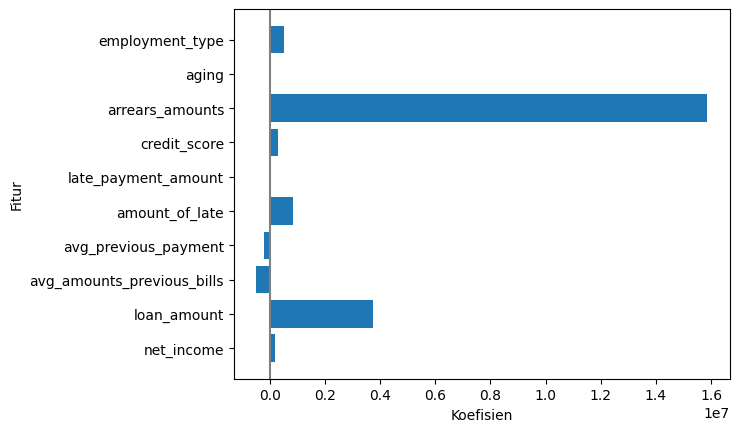

In [14]:
# Akses koefisien
coefficients = model.coef_.ravel()

# Visualisasikan koefisien
plt.barh(X_train.columns, coefficients)
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color=".5")
plt.show()

### Experiment of Amount of Late

In [15]:
X_train_experiment = X_train["amount_of_late"]
X_test_experiment = X_test["amount_of_late"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

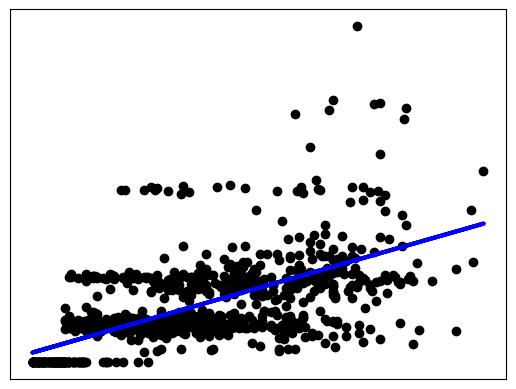

In [16]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 191942936969251.78
      Mean Absolute Error : 9470162.28
      Mean Absolute Percentage Error : 4285342304850689392640.00
      Root Mean Squared Error : 4285342304850689392640.00
      R_Squared : 0.35
      


### Experiment of net_income

In [18]:
X_train_experiment = X_train["net_income"]
X_test_experiment = X_test["net_income"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

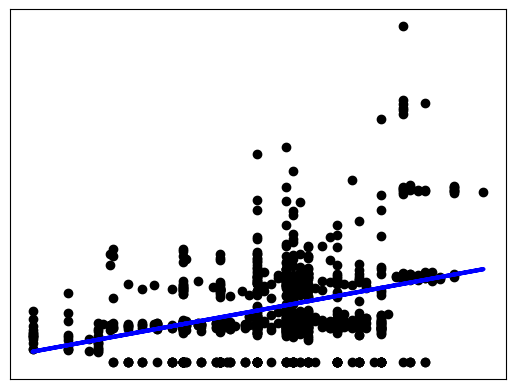

In [19]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 248662765218551.09
      Mean Absolute Error : 11084688.79
      Mean Absolute Percentage Error : 13523463961396130086912.00
      Root Mean Squared Error : 13523463961396130086912.00
      R_Squared : 0.16
      


### Experiment of Loan Amounts

In [21]:
X_train_experiment = X_train["loan_amount"]
X_test_experiment = X_test["loan_amount"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

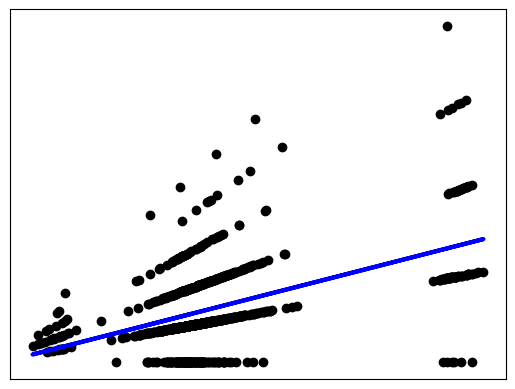

In [22]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 216513404724000.72
      Mean Absolute Error : 11048721.81
      Mean Absolute Percentage Error : 13614054420589297270784.00
      Root Mean Squared Error : 13614054420589297270784.00
      R_Squared : 0.27
      


### Experiment of Arrears Amount

In [24]:
X_train_experiment = X_train["arrears_amounts"]
X_test_experiment = X_test["arrears_amounts"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

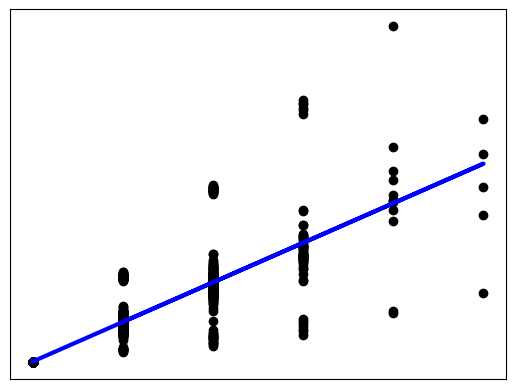

In [25]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 108627998181640.53
      Mean Absolute Error : 5064064.78
      Mean Absolute Percentage Error : 167039120991410782208.00
      Root Mean Squared Error : 167039120991410782208.00
      R_Squared : 0.63
      


### Experiment of Avg_amounts_previous_bills

In [27]:
X_train_experiment = X_train["avg_amounts_previous_bills"]
X_test_experiment = X_test["avg_amounts_previous_bills"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

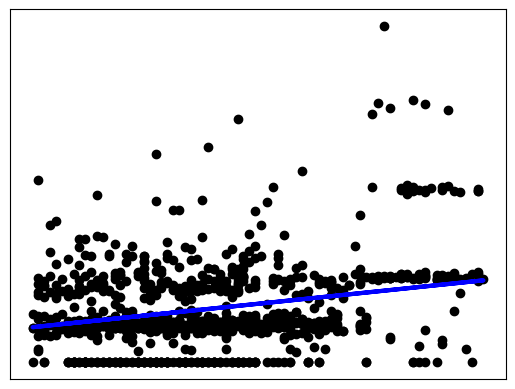

In [28]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 266120557763329.91
      Mean Absolute Error : 11663498.40
      Mean Absolute Percentage Error : 13457036031974600343552.00
      Root Mean Squared Error : 13457036031974600343552.00
      R_Squared : 0.10
      


### Experiment of Age

In [30]:
X_train_experiment = X_train["aging"]
X_test_experiment = X_test["aging"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

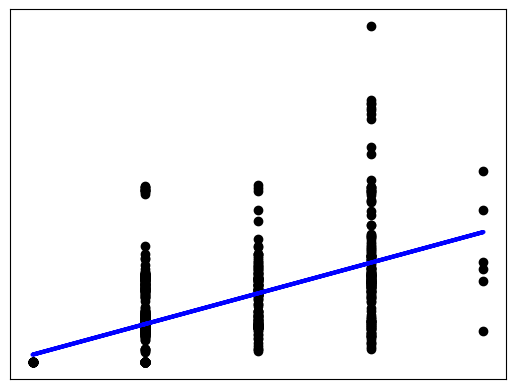

In [31]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 212439080926816.19
      Mean Absolute Error : 9414691.29
      Mean Absolute Percentage Error : 8289499283949560528896.00
      Root Mean Squared Error : 8289499283949560528896.00
      R_Squared : 0.28
      


### Experiment of Aging

In [33]:
X_train_experiment = X_train["aging"]
X_test_experiment = X_test["aging"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

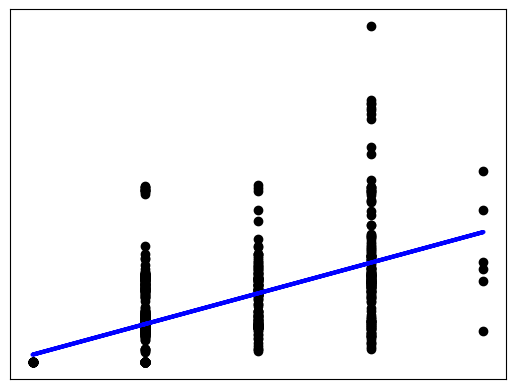

In [34]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 212439080926816.19
      Mean Absolute Error : 9414691.29
      Mean Absolute Percentage Error : 8289499283949560528896.00
      Root Mean Squared Error : 8289499283949560528896.00
      R_Squared : 0.28
      


### Experiment of late_payment

In [36]:
X_train_experiment = X_train["late_payment_amount"]
X_test_experiment = X_test["late_payment_amount"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

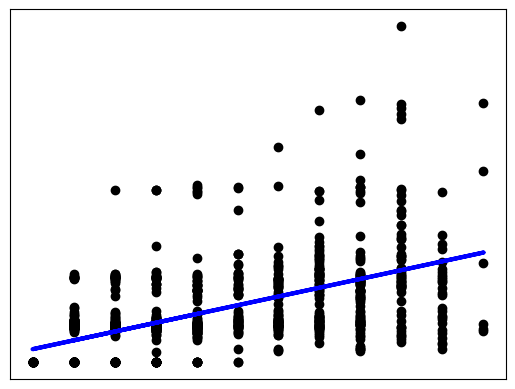

In [37]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 222202470075639.56
      Mean Absolute Error : 10349588.21
      Mean Absolute Percentage Error : 6722177914075805122560.00
      Root Mean Squared Error : 6722177914075805122560.00
      R_Squared : 0.25
      


### Experiment of Credit Score

In [39]:
X_train_experiment = X_train["credit_score"]
X_test_experiment = X_test["credit_score"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

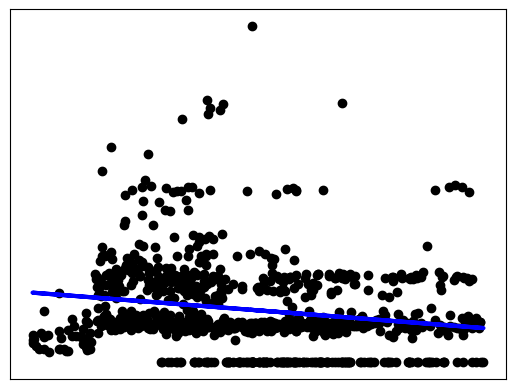

In [40]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [41]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 288506413762968.19
      Mean Absolute Error : 12347160.03
      Mean Absolute Percentage Error : 12856680050272573063168.00
      Root Mean Squared Error : 12856680050272573063168.00
      R_Squared : 0.03
      


### Experiment of Employment Type

In [42]:
X_train_experiment = X_train["employment_type"]
X_test_experiment = X_test["employment_type"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

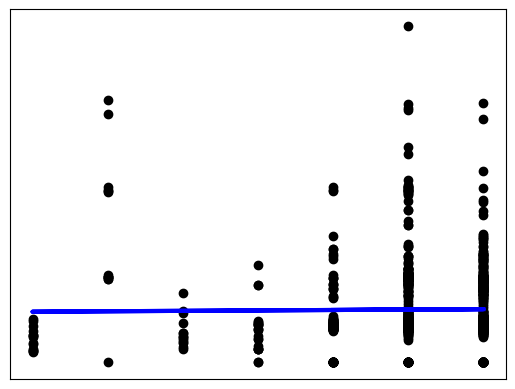

In [43]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 297076142005623.06
      Mean Absolute Error : 12693854.00
      Mean Absolute Percentage Error : 14082268820504536154112.00
      Root Mean Squared Error : 14082268820504536154112.00
      R_Squared : -0.00
      


### Lasso

In [45]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

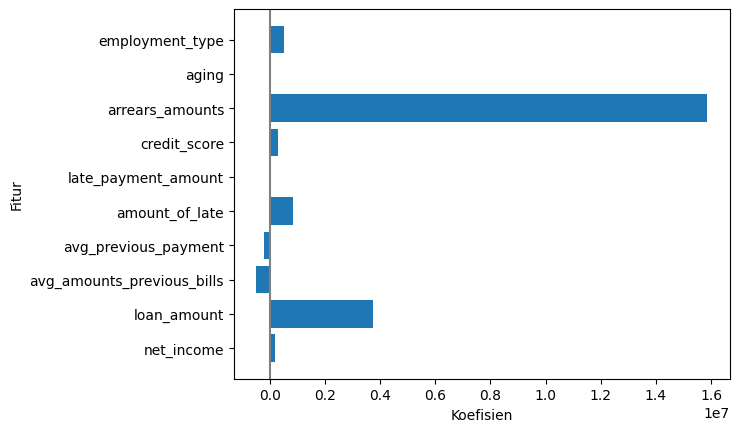

In [46]:
# Akses koefisien
coefficients = lasso.coef_.ravel()

# Visualisasikan koefisien
plt.barh(X_train.columns, coefficients)
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color=".5")
plt.show()

In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 297076142005623.06
      Mean Absolute Error : 12693854.00
      Mean Absolute Percentage Error : 14082268820504536154112.00
      Root Mean Squared Error : 14082268820504536154112.00
      R_Squared : -0.00
      


In [48]:
y.describe()

count    5.000000e+03
mean     2.134012e+07
std      1.821149e+07
min      0.000000e+00
25%      1.358333e+07
50%      1.562500e+07
75%      3.041667e+07
max      1.785417e+08
Name: loss_reverse, dtype: float64

In [49]:
# Menentukan grid hyperparameter yang akan dijelajahi
param_grid = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],  # Nilai alpha yang berbeda

}

# Inisiasi GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X, y)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.134e+16, tolerance: 1.318e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.391e+16, tolerance: 1.343e+14
  model = cd_fast.enet_coordinate_descent(
c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [50]:
grid_search.best_score_

0.9023707913313717

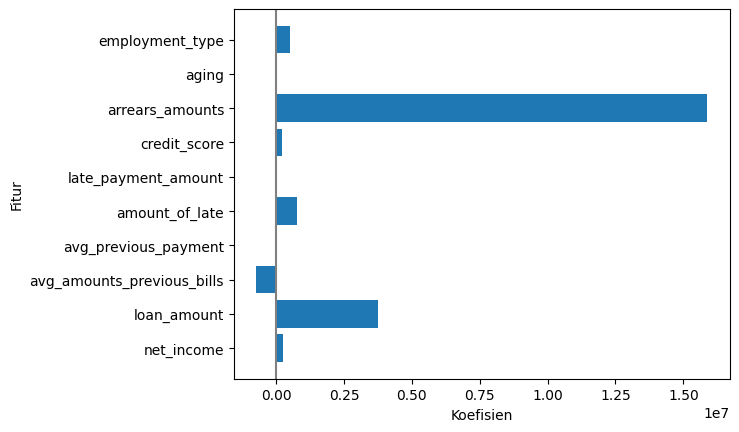

In [51]:
lasso = grid_search.best_estimator_
y_pred = lasso.predict(X_test)
# Akses koefisien
coefficients = lasso.coef_.ravel()

# Visualisasikan koefisien
plt.barh(X_train.columns, coefficients)
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.axvline(x=0, color=".5")
plt.show()

In [52]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 25832551118020.23
      Mean Absolute Error : 2564884.15
      Mean Absolute Percentage Error : 2177655660901100945408.00
      Root Mean Squared Error : 2177655660901100945408.00
      R_Squared : 0.91
      


In [53]:
import pickle

pickle.dump(lasso, open("lasso.pkl", "wb"))

In [55]:
y.describe()

count    5.000000e+03
mean     2.134012e+07
std      1.821149e+07
min      0.000000e+00
25%      1.358333e+07
50%      1.562500e+07
75%      3.041667e+07
max      1.785417e+08
Name: loss_reverse, dtype: float64

In [56]:
import joblib
load_model = joblib.load('lasso.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


10995919.579725027

In [58]:
y_test.iloc[-1]

12041666.666666666